# Comparing the popularity of different RPG-Games mentioned in comments on 9gag.com

In [1]:
from matplotlib import font_manager
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import operator
import time
import re

In [2]:
url = 'https://9gag.com/gag/aVqyj5P'
driver = webdriver.Firefox()
driver.get(url)

In [3]:
secs_to_scrape = 900

start = time.time()
while time.time()-start<secs_to_scrape:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    try:
        driver.find_elements_by_xpath("//*[contains(text(), 'Load More Comments')]")[0].click()
    except:
        pass
    
html = driver.page_source
bs = BeautifulSoup(html, 'lxml')

driver.close()

In [4]:
games = {}

number_mapping = {'i':' 1',
                  'ii':' 2',
                  'iii':' 3',
                  'iv':' 4',
                  'v':' 5',
                  'vi':' 6',
                  'vii':' 7',
                  'viii':' 8',
                  'ix':' 9',
                  'x':' 10',
                  'xi':' 11',
                  'xii':' 12',
                  'xiii':' 13',
                  'xiv':' 14',
                  'xv':' 15',
                  'xvi':' 16',
                  'xvii':' 17',
                  'xvii':' 18',
                  'xix':' 19',
                  'xx':' 20'}


pattern = re.compile('[a-z].*')

comments = len(bs.findAll('div', {'class':'content badge-content'}))
for comment in bs.findAll('div', {'class':'content badge-content'}):
    a = str(comment).lower()
    for row in a.split('">')[1].replace('</div>', '').split('<br/>'):
        for elem in row.split(','):
            try:
                elem = pattern.search(elem).group()
                elem = elem.replace("'", '').replace(':', '').strip()
                elem = elem.replace('kotor', 'knights of the old republic')
                if elem.startswith('the '):
                    elem = elem[4:]
                if elem=='wow':
                    elem = 'world of warcraft'
                if elem.startswith('ff '):
                    elem = elem.replace('ff', 'final fantasy')
                elem = re.sub('([a-z])(\d)', r'\1 \2', elem)
                try:
                    elem = re.sub(r' ([a-z]+\Z)', lambda x: number_mapping[x.group(1)], elem)
                except:
                    pass

                elem = elem.title()
                if elem in games.keys():
                    games[elem] += 1
                else:
                    games[elem] = 1
            except:
                pass
            
games = sorted(games.items(), key=operator.itemgetter(1), reverse=True)
games

[('Skyrim', 303),
 ('Witcher 3', 252),
 ('World Of Warcraft', 138),
 ('Chrono Trigger', 110),
 ('Diablo 2', 85),
 ('Final Fantasy 7', 75),
 ('Dark Souls', 70),
 ('Fallout New Vegas', 66),
 ('Baldurs Gate', 64),
 ('Morrowind', 61),
 ('Baldurs Gate 2', 61),
 ('Mass Effect 2', 53),
 ('Planescape Torment', 53),
 ('Dragon Age Origins', 52),
 ('Fallout 2', 51),
 ('Final Fantasy', 46),
 ('Knights Of The Old Republic', 45),
 ('Pokemon', 45),
 ('Mass Effect', 43),
 ('Oblivion', 39),
 ('Witcher', 39),
 ('Final Fantasy 6', 38),
 ('Fallout 4', 38),
 ('Fallout 3', 38),
 ('Fallout', 37),
 ('Runescape', 36),
 ('Dark Souls 3', 35),
 ('Final Fantasy 9', 34),
 ('Bloodborne', 30),
 ('Secret Of Mana', 30),
 ('Dragon Age', 28),
 ('Final Fantasy 10', 27),
 ('Fallout Series', 24),
 ('Suikoden 2', 24),
 ('Gothic 2', 22),
 ('Neverwinter Nights', 22),
 ('Golden Sun', 21),
 ('Xenoblade Chronicles', 21),
 ('Legend Of Dragoon', 20),
 ('Mass Effect Series', 19),
 ('Diablo 3', 19),
 ('Offline', 19),
 ('Diablo', 19),

In [5]:
df = pd.DataFrame(games, columns=['Title', 'Score'])
df.to_csv('build/9gag_RPG_Popularity.csv', index=False)
df.head()

,Title,Score
0,Skyrim,303
1,Witcher 3,252
2,World Of Warcraft,138
3,Chrono Trigger,110
4,Diablo 2,85


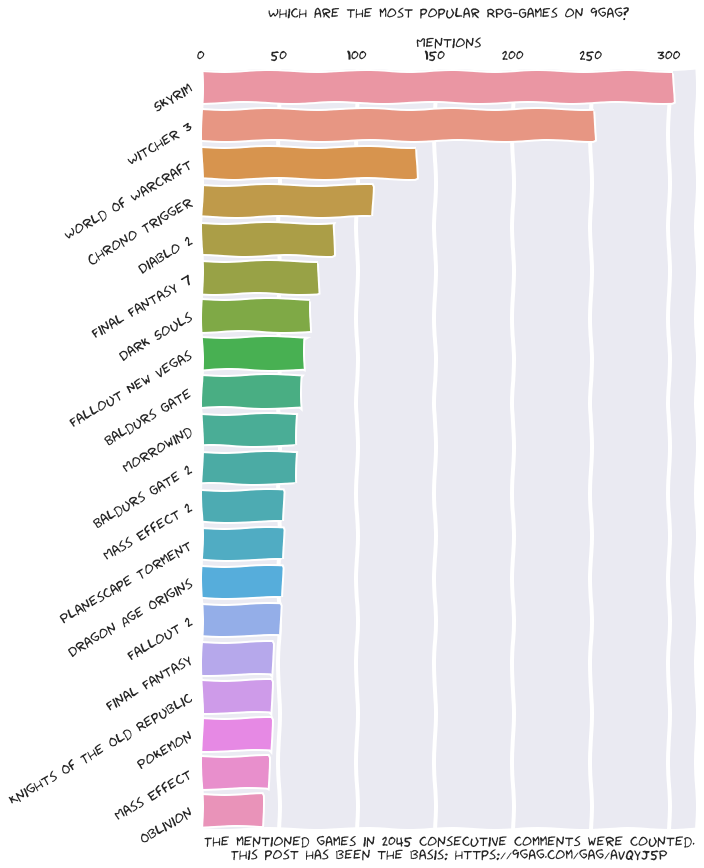

In [10]:
plt.xkcd()
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,12))

sns.barplot(x="Score", y="Title", data=df.head(20))

path = '/usr/share/fonts/truetype/Humor-Sans-1.0.ttf'
prop = font_manager.FontProperties(fname=path)

plt.title('Which are the most popular RPG-Games on 9gag?', fontproperties=prop, y=1.06)
plt.xlabel('Mentions', fontproperties=prop)
ax.xaxis.set_label_position('top')

plt.ylabel('')

plt.xticks()
plt.yticks(rotation=30)

txt = '''The mentioned games in {} consecutive comments were counted.
This post has been the basis: https://9gag.com/gag/aVqyj5P'''.format(comments)

fig.text(.635, 0.005, txt, ha='center', fontproperties=prop)
ax.xaxis.tick_top()
plt.xticks(fontproperties=prop)
plt.yticks(fontproperties=prop)

plt.tight_layout()

plt.savefig('build/9gag_RPG_Popularity.png')
plt.savefig('build/9gag_RPG_Popularity.pdf')

plt.show()